In [1]:
# Read Fashion MNIST dataset

import util_mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .

In [2]:
import keras
import tensorflow as tf
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import models, layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import numpy as np

Using TensorFlow backend.
C:\Users\ashis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ashis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ashis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ashis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
#Normalize Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#Convert the output classes to categorical
y_train=keras.utils.np_utils.to_categorical(y_train,10)
y_test=keras.utils.np_utils.to_categorical(y_test,10)

In [5]:
#1 Hidden-Layer Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Compile Model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
k=model.fit(x=X_train, 
            y=y_train, 
            epochs=100, 
            validation_data=(X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 266us/step - loss: 0.7063 - accuracy: 0.7756 - val_loss: 0.5547 - val_accuracy: 0.8129
Epoch 2/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.4986 - accuracy: 0.8310 - val_loss: 0.5028 - val_accuracy: 0.8265
Epoch 3/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.4566 - accuracy: 0.8446 - val_loss: 0.4878 - val_accuracy: 0.8260
Epoch 4/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.4324 - accuracy: 0.8509 - val_loss: 0.4472 - val_accuracy: 0.8433
Epoch 5/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.4148 - accuracy: 0.8576 - val_loss: 0.4424 - val_accuracy: 0.8439
Epoch 6/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.4009 - accuracy: 0.8605 - val_loss: 0.4247 - val_accuracy: 0.8495
Epoch 7/100
60000/60000 [=============================

Epoch 54/100
60000/60000 [==============================] - 7s 123us/step - loss: 0.2117 - accuracy: 0.9263 - val_loss: 0.3227 - val_accuracy: 0.8846
Epoch 55/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.2100 - accuracy: 0.9266 - val_loss: 0.3184 - val_accuracy: 0.8884
Epoch 56/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.2073 - accuracy: 0.9283 - val_loss: 0.3229 - val_accuracy: 0.8869
Epoch 57/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.2060 - accuracy: 0.9282 - val_loss: 0.3115 - val_accuracy: 0.8891
Epoch 58/100
60000/60000 [==============================] - 7s 123us/step - loss: 0.2032 - accuracy: 0.9296 - val_loss: 0.3390 - val_accuracy: 0.8787
Epoch 59/100
60000/60000 [==============================] - 8s 126us/step - loss: 0.2021 - accuracy: 0.9297 - val_loss: 0.3151 - val_accuracy: 0.8891
Epoch 60/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1995 - accuracy:

In [7]:
#Predict Y and Round Its Labels And Find Confusion Matrix On The Test Set
y_pred=pd.DataFrame(np.array(model.predict_classes(X_test)))
rounded_labels=np.argmax(y_test, axis=1)
matrix = confusion_matrix(rounded_labels,y_pred)
matrix

array([[834,   0,  14,  24,   4,   1, 115,   0,   8,   0],
       [  4, 969,   1,  20,   2,   0,   3,   0,   1,   0],
       [ 17,   0, 843,  14,  51,   1,  74,   0,   0,   0],
       [ 19,   5,  10, 915,  19,   0,  28,   0,   4,   0],
       [  0,   1, 113,  40, 771,   0,  72,   0,   3,   0],
       [  1,   0,   0,   1,   0, 963,   0,  20,   0,  15],
       [ 92,   0,  74,  29,  45,   0, 751,   0,   9,   0],
       [  0,   0,   0,   0,   0,  13,   0, 968,   0,  19],
       [  7,   0,   8,   7,   2,   3,   7,   6, 960,   0],
       [  0,   0,   0,   0,   0,  10,   1,  35,   0, 954]], dtype=int64)

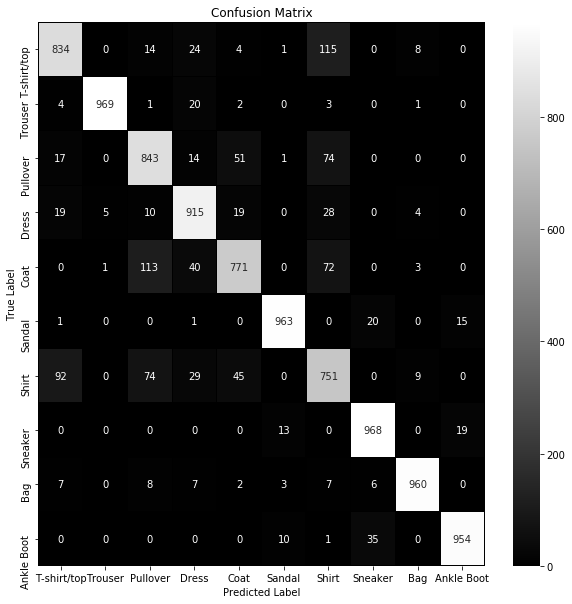

In [8]:
#Plot The Confusion Matrix
label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [9]:
#Find Accuracy As Sum Of Diagonal Elements Of Confusion Matrix
sum = np.trace(matrix)
acc=sum/len(y_test)
print(acc)

0.8928


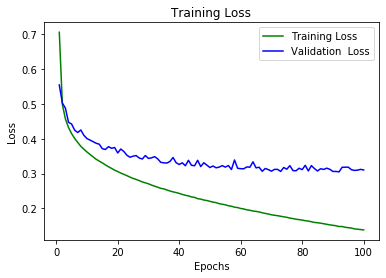

In [10]:
#Plot Training Loss Vs No Of Epochs And Validation Loss Vs No Of Epochs
loss_train = k.history['loss']
val_loss = k.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation  Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
print("In A Single Hidden Layer Neural Network We Train The Model To Get An Train Accuracy of 95 percent While ")
print("We Get A Test Accuracy Of 89 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.1 in 100 Iterations")
print("The Validation Loss Decreases From 0.575 to 0.4 in 100 Iterations")

In A Single Hidden Layer Neural Network We Train The Model To Get An Train Accuracy of 95 percent While 
We Get A Test Accuracy Of 89 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.1 in 100 Iterations
The Validation Loss Decreases From 0.575 to 0.4 in 100 Iterations


In [12]:
#Multi Hidden-Layer Neural Network
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=784))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compile Model
model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
k1=model1.fit(x=X_train, 
            y=y_train, 
            epochs=100, 
            validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.8377 - accuracy: 0.7141 - val_loss: 0.5799 - val_accuracy: 0.7903
Epoch 2/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.5008 - accuracy: 0.8234 - val_loss: 0.4944 - val_accuracy: 0.8264
Epoch 3/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.4485 - accuracy: 0.8422 - val_loss: 0.4848 - val_accuracy: 0.8261
Epoch 4/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.4167 - accuracy: 0.8522 - val_loss: 0.4307 - val_accuracy: 0.8459
Epoch 5/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.3948 - accuracy: 0.8596 - val_loss: 0.4081 - val_accuracy: 0.8538
Epoch 6/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.3769 - accuracy: 0.8663 - val_loss: 0.4170 - val_accuracy: 0.8501
Epoch 7/100
60000/60000 [==============================] - 6

In [14]:
#Predict Y and Round Its Labels And Find Confusion Matrix On The Test Set
y_pred1=pd.DataFrame(np.array(model1.predict_classes(X_test)))
rounded_labels=np.argmax(y_test, axis=1)
matrix1 = confusion_matrix(rounded_labels,y_pred1)
matrix1

array([[874,   1,  19,  27,   4,   1,  64,   0,  10,   0],
       [  3, 975,   1,  16,   1,   0,   2,   0,   2,   0],
       [ 28,   2, 827,  17,  71,   0,  55,   0,   0,   0],
       [ 22,   8,  12, 914,  19,   1,  20,   0,   3,   1],
       [  3,   0,  79,  45, 800,   1,  69,   0,   3,   0],
       [  0,   0,   1,   1,   1, 956,   0,  22,   2,  17],
       [154,   1,  87,  38,  56,   0, 658,   0,   6,   0],
       [  0,   0,   0,   0,   0,  11,   0, 958,   2,  29],
       [  7,   0,   5,   8,   4,   2,   6,   3, 965,   0],
       [  1,   0,   0,   1,   0,   6,   0,  29,   0, 963]], dtype=int64)

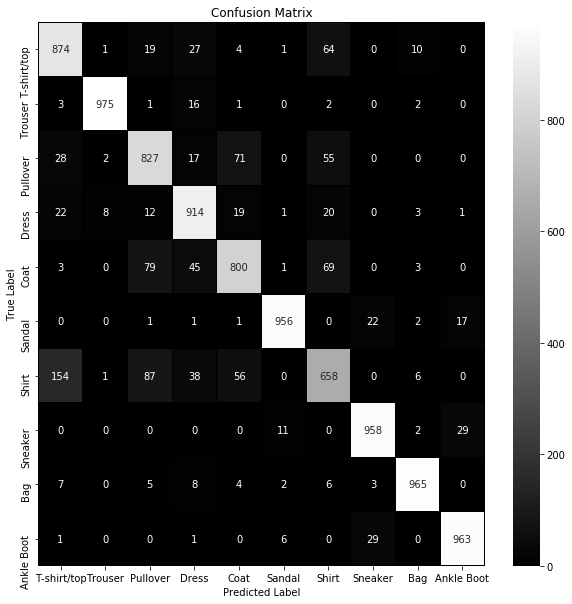

In [15]:
#Plot The Confusion Matrix
label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(matrix1, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
#Find Accuracy As Sum Of Diagonal Elements Of Confusion Matrix
sum1 = np.trace(matrix1)
acc1=sum1/len(y_test)
print(acc1)

0.889


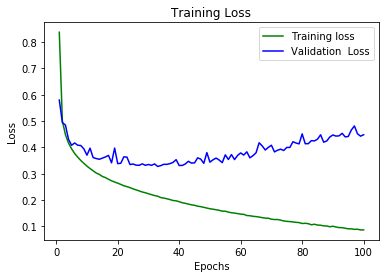

In [18]:
#Plot Training Loss Vs No Of Epochs And Validation Loss Vs No Of Epochs
loss_train = k1.history['loss']
val_loss = k1.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation  Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
print("In A Multi Hidden Layer Neural Network We Train The Model To Get An Train Accuracy of 97 percent While ")
print("We Get A Test Accuracy Of 89 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.1 in 100 Iterations")
print("The Validation Loss Decreases From 0.6 to 0.57 in 100 Iterations")
print("The Accuracy Has Not Increased Much In Comparison To A Single Layer Neural Network")

In A Multi Hidden Layer Neural Network We Train The Model To Get An Train Accuracy of 95 percent While 
We Get A Test Accuracy Of 89 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.1 in 100 Iterations
The Validation Loss Decreases From 0.6 to 0.57 in 100 Iterations


In [5]:
#Reshaping The Train And Test Matrices To Fit To A Convolution Neural Network
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#Convolution Neural Network
model2=models.Sequential()
model2.add(layers.Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.20))

model2.add(layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))

model2.add(layers.Dense(10,activation="softmax"))
model2.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 256)         0         
____

In [7]:
#Compile Model
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
k2=model2.fit(x=X_train, 
            y=y_train, 
            epochs=100, 
            validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 25s 417us/sample - loss: 0.6408 - acc: 0.7688 - val_loss: 0.4020 - val_acc: 0.8512
Epoch 2/100
60000/60000 [==============================] - 29s 480us/sample - loss: 0.4168 - acc: 0.8498 - val_loss: 0.3416 - val_acc: 0.8742
Epoch 3/100
60000/60000 [==============================] - 20s 335us/sample - loss: 0.3668 - acc: 0.8655 - val_loss: 0.3200 - val_acc: 0.8845
Epoch 4/100
60000/60000 [==============================] - 18s 300us/sample - loss: 0.3321 - acc: 0.8794 - val_loss: 0.3062 - val_acc: 0.8861
Epoch 5/100
60000/60000 [==============================] - 18s 306us/sample - loss: 0.3144 - acc: 0.8836 - val_loss: 0.3165 - val_acc: 0.8796
Epoch 6/100
60000/60000 [==============================] - 19s 319us/sample - loss: 0.2947 - acc: 0.8917 - val_loss: 0.3126 - val_acc: 0.8766
Epoch 7/100
60000/60000 [==============================] - 19s 313us/sample - loss: 0.2863 - acc: 

Epoch 58/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0913 - acc: 0.9655 - val_loss: 0.2563 - val_acc: 0.9253
Epoch 59/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0935 - acc: 0.9648 - val_loss: 0.2550 - val_acc: 0.9243
Epoch 60/100
60000/60000 [==============================] - 24s 394us/sample - loss: 0.0902 - acc: 0.9655 - val_loss: 0.2599 - val_acc: 0.9243
Epoch 61/100
60000/60000 [==============================] - 26s 428us/sample - loss: 0.0876 - acc: 0.9661 - val_loss: 0.2693 - val_acc: 0.9244
Epoch 62/100
60000/60000 [==============================] - 25s 418us/sample - loss: 0.0868 - acc: 0.9673 - val_loss: 0.2595 - val_acc: 0.9245
Epoch 63/100
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0882 - acc: 0.9671 - val_loss: 0.2761 - val_acc: 0.9212
Epoch 64/100
60000/60000 [==============================] - 23s 387us/sample - loss: 0.0845 - acc: 0.9679 - val_loss: 0.2594 - val_acc: 0.9255

In [8]:
#Predict Y and Round Its Labels And Find Confusion Matrix On The Test Set
y_pred2=pd.DataFrame(np.array(model2.predict_classes(X_test)))
rounded_labels=np.argmax(y_test, axis=1)
matrix2 = confusion_matrix(rounded_labels,y_pred2)
matrix2

array([[846,   0,  16,  27,   5,   1, 102,   0,   3,   0],
       [  1, 981,   1,  12,   3,   0,   0,   0,   2,   0],
       [ 14,   0, 862,   6,  49,   0,  69,   0,   0,   0],
       [  7,   4,  12, 931,  26,   0,  20,   0,   0,   0],
       [  1,   0,  26,  18, 893,   0,  61,   1,   0,   0],
       [  0,   0,   0,   0,   0, 981,   0,  14,   0,   5],
       [ 81,   1,  35,  26,  44,   0, 809,   0,   4,   0],
       [  0,   0,   0,   0,   0,   3,   0, 984,   0,  13],
       [  2,   1,   3,   5,   3,   2,   3,   2, 978,   1],
       [  0,   0,   0,   0,   0,   4,   0,  25,   1, 970]], dtype=int64)

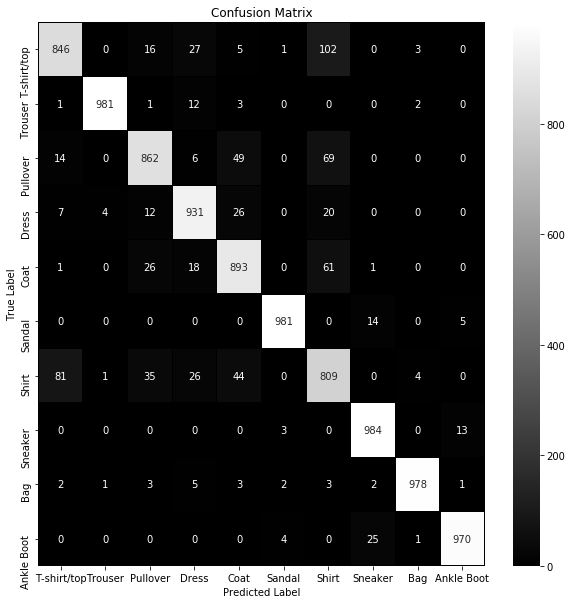

In [9]:
#Plot The Confusion Matrix
label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(matrix2, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [10]:
#Find Accuracy As Sum Of Diagonal Elements Of Confusion Matrix
sum2 = np.trace(matrix2)
acc2=sum2/len(y_test)
print(acc2)

0.9235


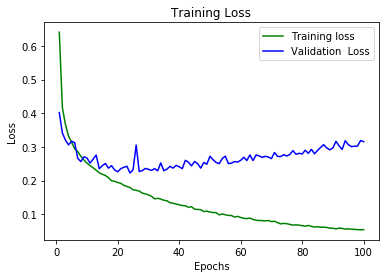

In [11]:
#Plot Training Loss Vs No Of Epochs And Validation Loss Vs No Of Epochs
loss_train = k2.history['loss']
val_loss = k2.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation  Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
print("In A Convolutional Neural Network We Train The Model To Get An Train Accuracy of 98 percent While ")
print("We Get A Test Accuracy Of 92 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.01 in 100 Iterations")
print("The Validation Loss Decreases From 0.4 to 0.33 in 100 Iterations")
print("The Accuracy Has Increaed In Comparison To A Single Or Multi Layer Neural Network")

In A Convolutional Neural Network We Train The Model To Get An Train Accuracy of 98 percent While 
We Get A Test Accuracy Of 92 Percent. We Also Observe That The Train Loss Decreases From 0.7-0.01 in 100 Iterations
The Validation Loss Decreases From 0.4 to 0.33 in 100 Iterations
The Accuracy Has Increaed In Comparison To A Single Or Multi Layer Neural Network
